In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from scipy import stats
from sklearn.metrics import f1_score
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

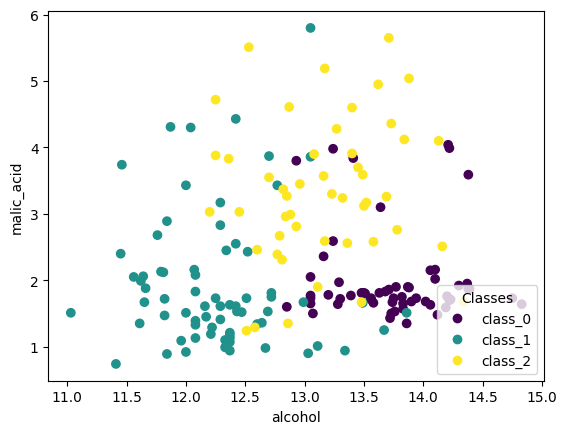

In [42]:
wine = load_wine()

print(wine)

_, ax = plt.subplots()
scatter = ax.scatter(wine.data[:, 0], wine.data[:, 1], c=wine.target)
ax.set(xlabel=wine.feature_names[0], ylabel=wine.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], wine.target_names, loc="lower right", title="Classes"
)

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=1234)

In [43]:
cls = []
cls.append(DecisionTreeClassifier(random_state=1234, min_samples_leaf=3, max_depth=1))
cls.append(BaggingClassifier(random_state=1234))
cls.append(AdaBoostClassifier(random_state=1234, algorithm="SAMME"))
cls.append(GradientBoostingClassifier(random_state=1234, max_depth=1, learning_rate=1.0, subsample=0.5))

In [45]:
for cl in cls:
    
    cl.fit(x_train, y_train)
    scor = cross_val_score(cl, x_train, y_train, cv = 5).mean()
    print(scor)

0.6446666666666666
0.9356666666666665
0.9593333333333334
0.9836666666666666


: 